In [ ]:
!tree /kaggle/input/d1namo-ecg-glucose-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import os
count1 =0
print('Diabetes ECG Data :\n\n')
for dirname, _, filenames in os.walk('/home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data'):
    
    for filename in filenames:
#         print(dirname  )
        count1 +=1
        print(count1,os.path.join(dirname,filename))
count2 =0 
print('\nHealthy ECG Data :\n\n')
for dirname, _, filenames in os.walk('/home/sncr0/data/d1namo/healthy_subset_ecg_data/healthy_subset_ecg_data'):
    
    for filename in filenames:
#         print(dirname  )
        count2 +=1
        print(count2,os.path.join(dirname,filename))
print(f'\n\nTotal Healthy ECG samples : {count2}\nTotal Unhealthy (Diabetic) ECG samples : {count1}')
# Any results you write to the current directory are saved as output.

Diabetes ECG Data :


1 /home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/007/sensor_data/2014_10_02-07_52_44/2014_10_02-07_52_44_ECG.csv
2 /home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/007/sensor_data/2014_10_01-08_42_43/2014_10_01-08_42_43_ECG.csv
3 /home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/007/sensor_data/2014_10_04-08_27_21/2014_10_04-08_27_21_ECG.csv
4 /home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/007/sensor_data/2014_10_03-06_46_57/2014_10_03-06_46_57_ECG.csv
5 /home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/008/sensor_data/2014_10_01-06_43_00/2014_10_01-06_43_00_ECG.csv
6 /home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/008/sensor_data/2014_10_03-10_51_39/2014_10_03-10_51_39_ECG.csv
7 /home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/008/sensor_data/2014_10_02-10_13_52/2014_10_02-10_13_52_ECG.cs

In [ ]:
# healthy_data, unhealthy_data = [],[]
# count1 =0
# for dirname, _, filenames in os.walk('/kaggle/input/d1namo-ecg-glucose-data/diabetes_subset_ecg_data/diabetes_subset_ecg_data'):
#     for filename in filenames:
#         uhd = pd.read_csv(os.path.join(dirname,filename))
#         unhealthy_data.append(uhd)
#         del uhd
#         count1+=1
#         print(f'{count1}Reading Unhealthy Data .... {filename}')
# count2 =0
# for dirname, _, filenames in os.walk('/kaggle/input/d1namo-ecg-glucose-data/healthy_subset_ecg_data/healthy_subset_ecg_data'):
#     for filename in filenames:
#         hd = pd.read_csv(os.path.join(dirname,filename))
#         healthy_data.append(hd)
#         del hd 
#         count2+=1
#         print(f'{count2}Reading healthy Data .... {filename}')

# can't load too many files RAM issue

### Analyse one feature

In [5]:
df = pd.read_csv('/home/sncr0/data/d1namo/diabetes_subset_ecg_data/diabetes_subset_ecg_data/007/sensor_data/2014_10_01-08_42_43/2014_10_01-08_42_43_ECG.csv')

df_s = df[600000:610000]
df_s.tail()

,Time,EcgWaveform
609995,01/10/2014 09:23:23.415,1980
609996,01/10/2014 09:23:23.419,1980
609997,01/10/2014 09:23:23.423,1976
609998,01/10/2014 09:23:23.427,1971
609999,01/10/2014 09:23:23.431,1966


In [ ]:
# df.shape

In [6]:
import tqdm

In [7]:
# for i in tqdm.tqdm_notebook(range(0,13553500,15000)):
#     df_s = df[i:i+15000].to_numpy()
#     print(df_s)

In [8]:
df_s.head()

,Time,EcgWaveform
600000,01/10/2014 09:22:43.435,2182
600001,01/10/2014 09:22:43.439,2194
600002,01/10/2014 09:22:43.443,2141
600003,01/10/2014 09:22:43.447,2040
600004,01/10/2014 09:22:43.451,1926


In [11]:
df_g = pd.read_csv('/home/sncr0/data/d1namo/diabetes_subset_pictures-glucose-food-insulin/diabetes_subset_pictures-glucose-food-insulin/001/glucose.csv')
df_g.tail()

,date,time,glucose,type,comments
1433,2014-10-06,16:34:02,12.3,cgm,NaN
1434,2014-10-06,16:39:02,12.5,cgm,NaN
1435,2014-10-06,16:44:02,12.5,cgm,NaN
1436,2014-10-06,16:49:02,12.3,cgm,NaN
1437,2014-10-06,16:54:02,12.1,cgm,NaN


<Axes: ylabel='Frequency'>

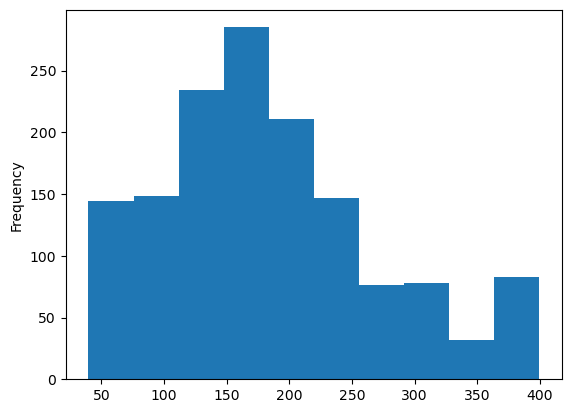

In [12]:
df_g['Time'] = df_g['date']+ " " + df_g['time']
df_g["Time"] = pd.to_datetime(df_g["Time"])
df_g["glucose_mg/dL"] = df_g['glucose']*18
df_g['glucose_mg/dL'].plot(kind='hist')


<Axes: xlabel='Time', ylabel='glucose_mg/dL'>

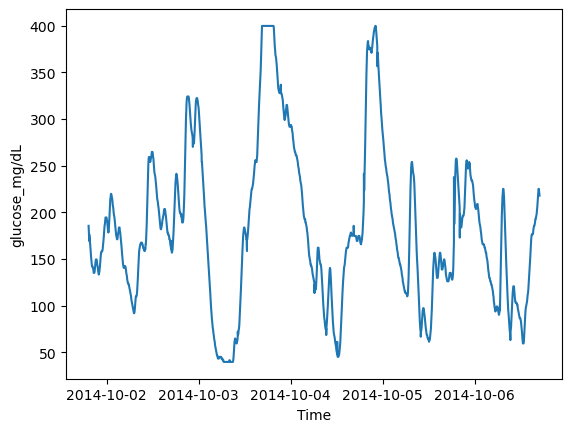

In [13]:
sns.lineplot(x='Time',y='glucose_mg/dL',data=df_g)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.stats import skew, kurtosis

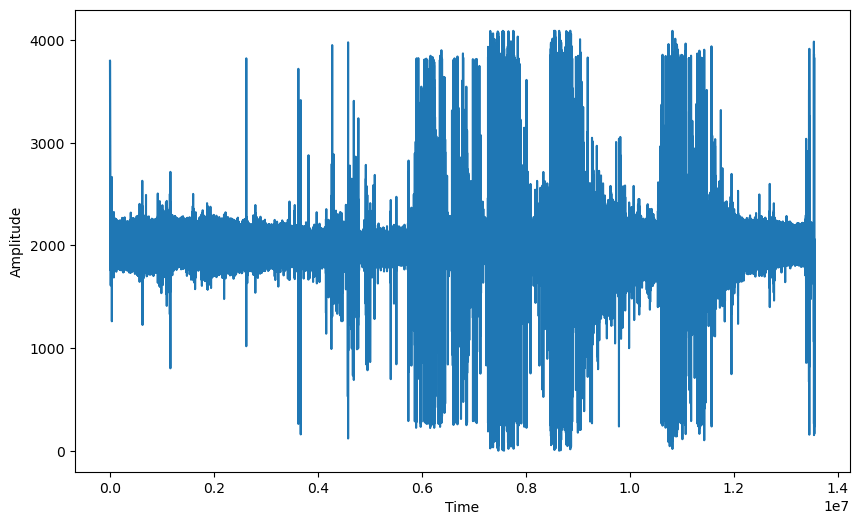

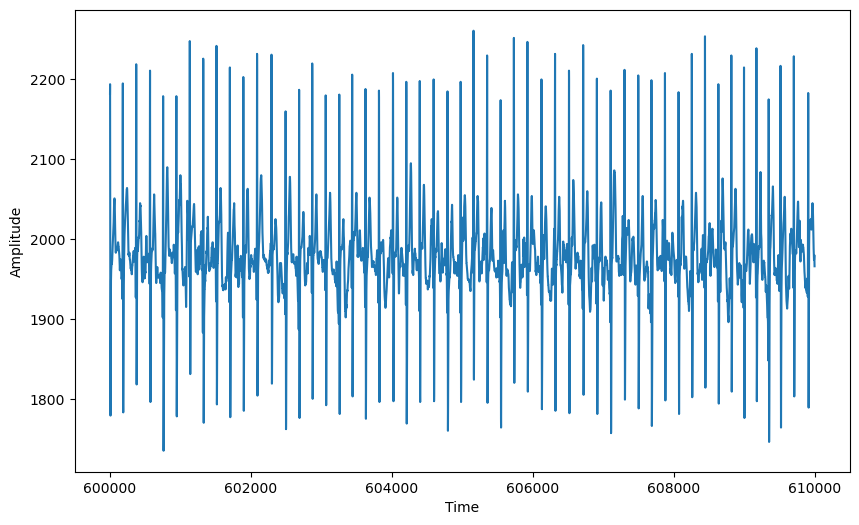

In [20]:
plt.figure(figsize=(10,6))
plt.plot(df["EcgWaveform"])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df_s["EcgWaveform"])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

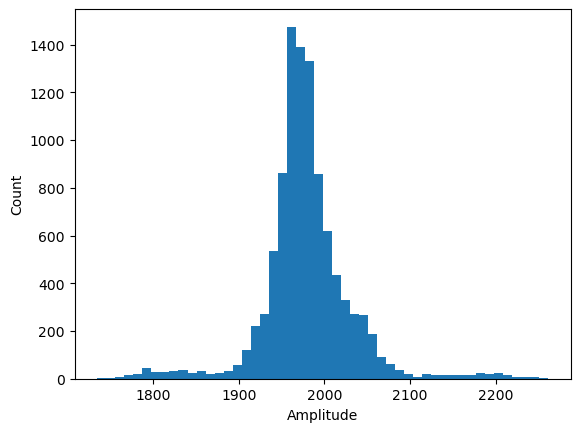

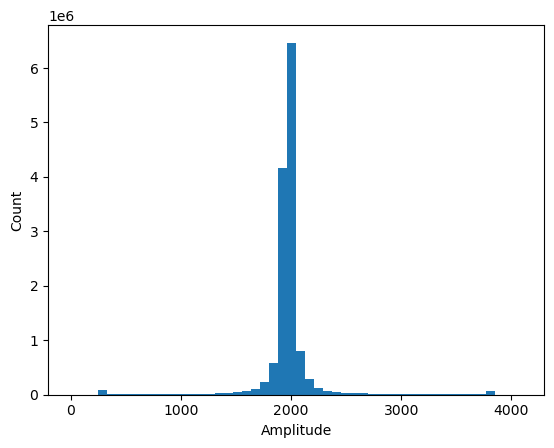

In [21]:
plt.hist(df_s["EcgWaveform"], bins=50)
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.show()

plt.hist(df["EcgWaveform"], bins=50)
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.show()

In [22]:
def get_features(df):
    mean = np.mean(df["EcgWaveform"])
    std = np.std(df["EcgWaveform"])
    skewness = skew(df["EcgWaveform"])
    kurt = kurtosis(df["EcgWaveform"])
    peaks, _ = find_peaks(df["EcgWaveform"], height=0)
    heart_rate = len(peaks) / (df.shape[0] / 3600)
    features = pd.DataFrame({"mean": [mean],
                             "std": [std],
                             "skewness": [skewness],
                             "kurtosis": [kurt],
                             "heart_rate": [heart_rate]})
    return features
features_all = get_features(df)
features_s = get_features(df_s)
f = pd.concat([features_all,features_s])
f.head()

,mean,std,skewness,kurtosis,heart_rate
0,1975.250137,263.175535,0.317573,27.487551,173.493784
0,1978.384200,52.889280,0.446544,5.583572,176.760000


In [23]:
features_all.iloc[0]

mean          1975.250137
std            263.175535
skewness         0.317573
kurtosis        27.487551
heart_rate     173.493784
Name: 0, dtype: float64

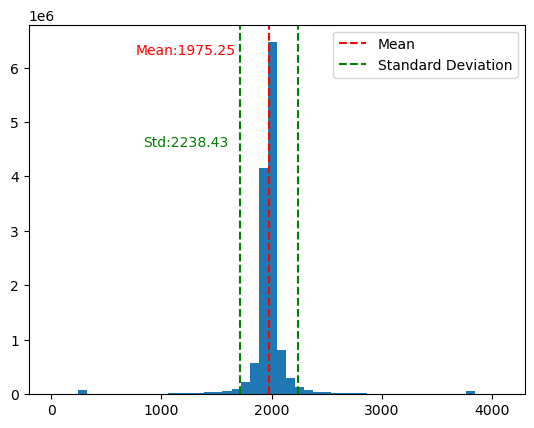

In [24]:
def get_hist_withfeatues(features_all,df,x):
    mean , std, skewness , kurtosis , heart_rate = features_all.iloc[0]
    plt.hist(df["EcgWaveform"], bins=50)
    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(mean+std, color='g', linestyle='--', label='Standard Deviation')
    plt.axvline(mean-std, color='g', linestyle='--')

    plt.text(mean-x, plt.ylim()[1]*0.95, 'Mean:{:.2f}'.format(mean), color='r', ha='center', va='top')
    plt.text(mean-std-100, plt.ylim()[1]*0.7, 'Std:{:.2f}'.format(mean+std), color='g', ha='right', va='top')
    # plt.text(mean-std, plt.ylim()[1]*0.9, 'Mean - SD: {:.2f}'.format(mean-std), color='g', ha='left', va='top')
    # Add a legend and display the plot
    plt.legend()
    plt.show()
get_hist_withfeatues(features_all,df,x=750)


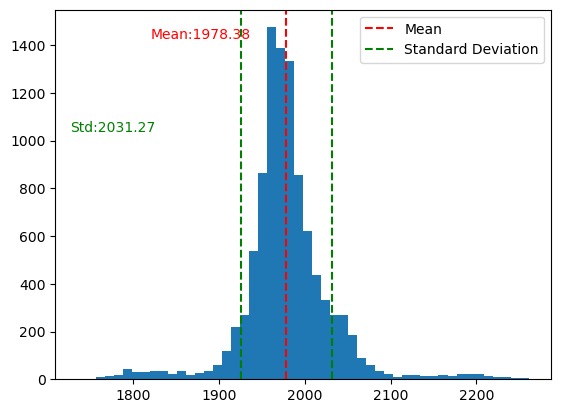

In [25]:
get_hist_withfeatues(features_s,df_s,x= 100)

In [26]:
# !pip install git+https://github.com/berndporr/py-ecg-detectors.git



In [27]:
df

,Time,EcgWaveform
0,01/10/2014 08:42:43.435,3798
1,01/10/2014 08:42:43.439,3798
2,01/10/2014 08:42:43.443,3798
3,01/10/2014 08:42:43.447,3798
4,01/10/2014 08:42:43.451,3798
...,...,...
13553495,01/10/2014 23:46:17.415,1831
13553496,01/10/2014 23:46:17.419,1831
13553497,01/10/2014 23:46:17.423,1831
13553498,01/10/2014 23:46:17.427,1830


In [28]:
from scipy.signal import butter, filtfilt
def detect_r_peaks(ecg_signal, fs):
    """
    Detect R-peaks from an ECG signal using a bandpass filter and a peak detection algorithm.
    Return the index of the R-peaks.
    
    Parameters:
    ecg_signal (array-like): An array-like object with the ECG signal.
    fs (float): The sampling frequency of the ECG signal.
    
    Returns:
    np.ndarray: An array with the indices of the R-peaks.
    """
    # Set up the filter
    nyquist_freq = 0.5 * fs
    low_cut = 5 / nyquist_freq
    high_cut = 15 / nyquist_freq
    b, a = butter(2, [low_cut, high_cut], btype='band')
    
    # Apply the filter
    filtered_ecg_signal = filtfilt(b, a, ecg_signal)
    
    # Detect the R-peaks
    r_peaks, _ = find_peaks(filtered_ecg_signal, distance=int(0.2 * fs), height=0.2, prominence=0.2)
    
    return r_peaks

# Function to calculate heart rate from ECG signal
def calculate_heart_rate(ecg_signal, fs):
    # Apply bandpass filter to remove unwanted frequencies
    b, a = signal.butter(4, [1, 40], btype='band', fs=fs)
    filtered_ecg_signal = signal.filtfilt(b, a, ecg_signal)
    
    # Detect R-peaks using a peak detector
    from ecgdetectors import Detectors
    detectors = Detectors(fs)
    r_peaks = detectors.pan_tompkins_detector(filtered_ecg_signal)
    
    # Calculate heart rate in beats per minute
    heart_rate = (len(r_peaks) - 1) / (len(ecg_signal) / fs / 60)
    
    return heart_rate

# Function to detect QRS complex and QRS peaks from ECG signal
def detect_qrs(ecg_signal, fs):
    # Apply bandpass filter to remove unwanted frequencies
    b, a = signal.butter(4, [5, 15], btype='band', fs=fs)
    filtered_ecg_signal = signal.filtfilt(b, a, ecg_signal)
    
    # Detect R-peaks using a peak detector
    from ecgdetectors import Detectors
    detectors = Detectors(fs)
    r_peaks = detectors.pan_tompkins_detector(filtered_ecg_signal)
    
    # Detect QRS complex
    qrs_complex = []
    for i in range(len(r_peaks) - 1):
        qrs_start = r_peaks[i] - int(fs * 0.1)
        qrs_end = r_peaks[i+1] + int(fs * 0.1)
        qrs_complex.append(filtered_ecg_signal[qrs_start:qrs_end])
    
    # Detect QRS peaks in each QRS complex
    qrs_peaks = []
    for complex in qrs_complex:
        qrs_peak_index = np.argmax(complex) + np.where(filtered_ecg_signal == complex[0])[0][0]
        qrs_peaks.append(qrs_peak_index)
    
    return qrs_complex, qrs_peaks


In [29]:
!pip install biosppy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 15.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 16.7 MB/s eta 0:00:0000:0100:01


In [30]:
# Calculate time interval between adjacent samples
# df["Time"] = pd.to_datetime(df["Time"])
# time_diff = df["Time"].diff().median().total_seconds()

# Calculate sampling rate as inverse of time interval
# fs = int(round(1.0 / time_diff))
# fs

/home/sncr0/anaconda3/envs/machine-learning/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


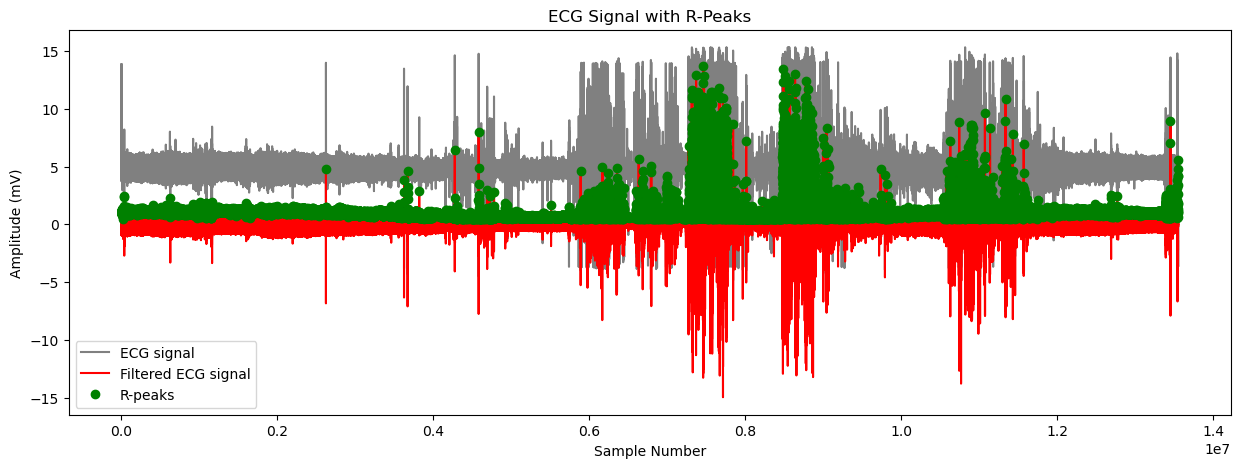

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Load ECG data from CSV file
# df = pd.read_csv('ecg_data.csv')

# Preprocessing
fs = 250  # Sampling rate
lowcut = 3  # Lower frequency of bandpass filter
highcut = 45  # Higher frequency of bandpass filter

# Convert ECG signal to mV
ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

# Apply bandpass filter
nyquist_rate = fs / 2.0
low = lowcut / nyquist_rate
high = highcut / nyquist_rate
b, a = butter(2, [low, high], btype='band')
ecg_cleaned = filtfilt(b, a, ecg_signal)

# Find R-peaks
r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

# Plot ECG signal with R-peaks
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ecg_signal, color='gray', label='ECG signal')
ax.plot(ecg_cleaned, color='red', label='Filtered ECG signal')
ax.plot(r_peaks, ecg_cleaned[r_peaks], "go", label="R-peaks")
ax.set_title("ECG Signal with R-Peaks")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Amplitude (mV)")
ax.legend()
plt.show()


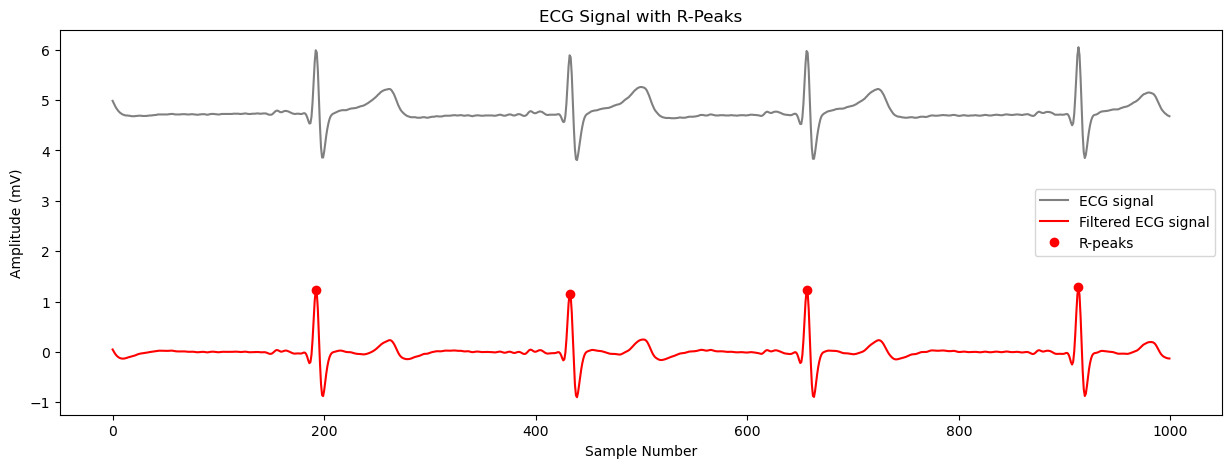

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt


def detect_r_peaks(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Plot ECG signal with R-peaks
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax.plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    ax.plot(r_peaks_in_range - sample_range[0], ecg_cleaned[r_peaks_in_range], "ro", label="R-peaks")
    ax.set_title("ECG Signal with R-Peaks")
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
    plt.show()
detect_r_peaks(df, [60000, 61000])


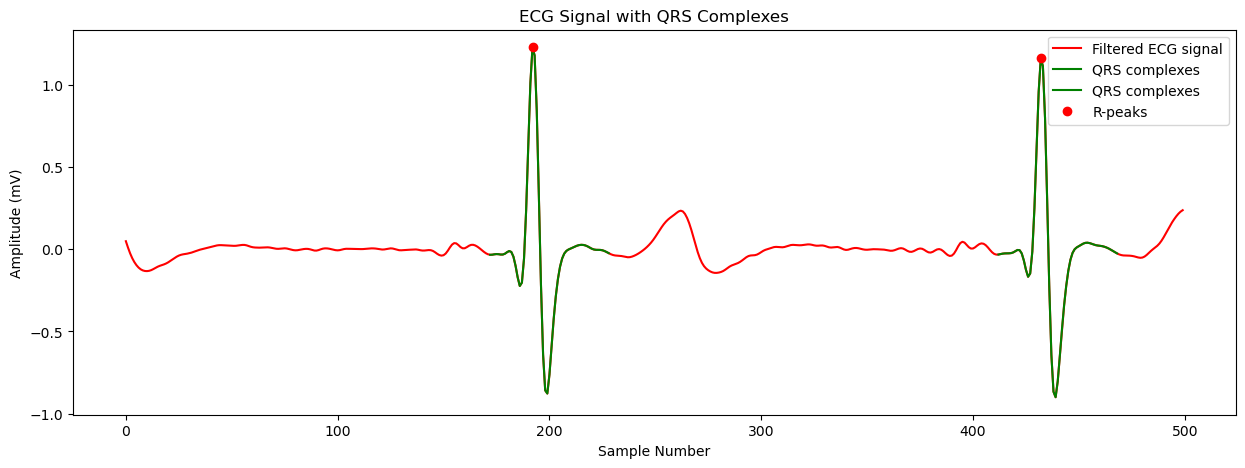

In [33]:
def detect_qrs_complexes1(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Find QRS complexes
    qrs_start = r_peaks_in_range - int(0.08 * fs)
    qrs_end = r_peaks_in_range + int(0.15 * fs)
    qrs_start[qrs_start < 0] = 0
    qrs_end[qrs_end >= len(ecg_cleaned)] = len(ecg_cleaned) - 1
    qrs_amplitudes = ecg_cleaned[r_peaks_in_range]
    qrs_complexes = []
    for i in range(len(qrs_start)):
        qrs = ecg_cleaned[qrs_start[i]:qrs_end[i]]
        qrs_complexes.append(qrs)

    # Plot ECG signal with QRS complexes
    fig, ax = plt.subplots(figsize=(15, 5))
#     ax.plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax.plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    for i in range(len(qrs_complexes)):
        ax.plot(range(qrs_start[i] - sample_range[0], qrs_end[i] - sample_range[0]), qrs_complexes[i], "g", label="QRS complexes")
    ax.plot(r_peaks_in_range - sample_range[0], qrs_amplitudes, "ro", label="R-peaks")
    ax.set_title("ECG Signal with QRS Complexes")
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
    plt.show()
detect_qrs_complexes1(df, [60000, 60500])

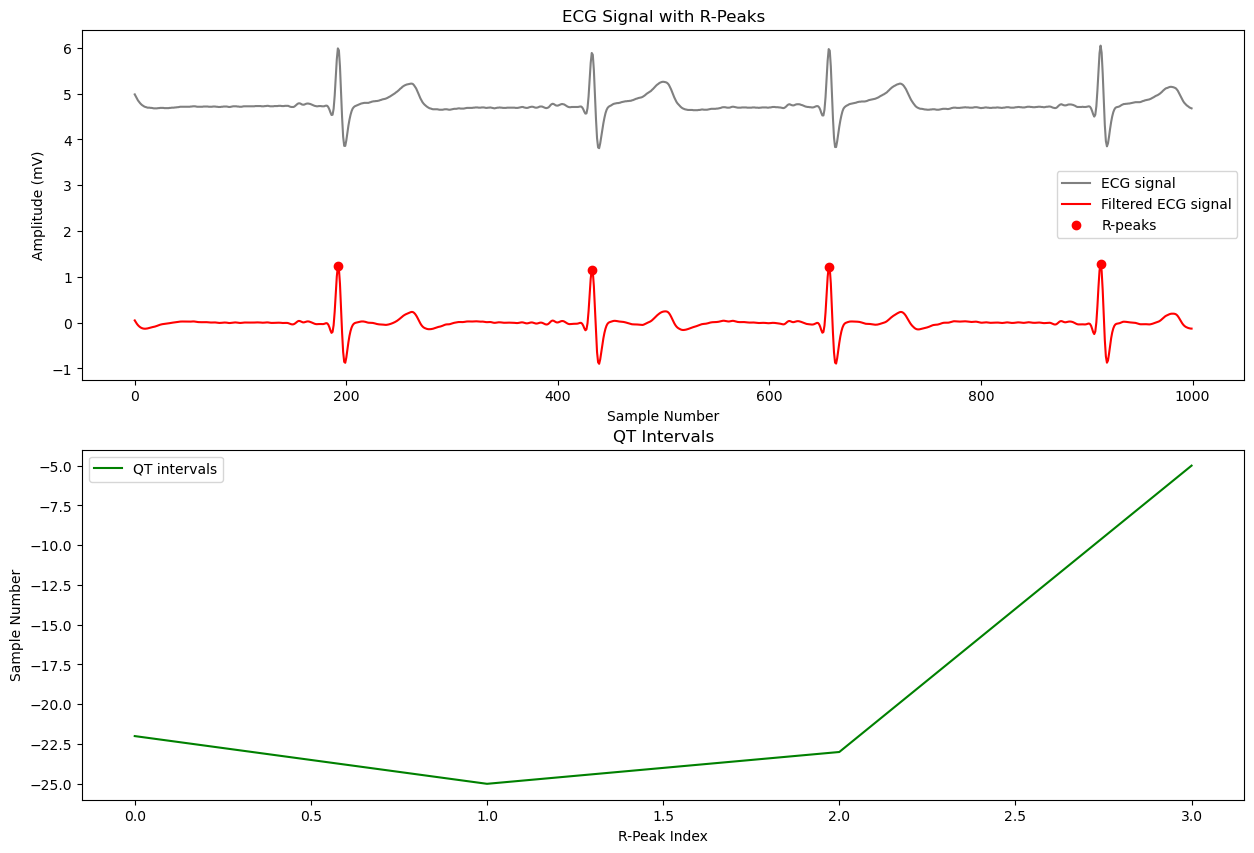

In [34]:
def detect_qt_interval(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]
    # Calculate QT interval
    qt_intervals = []
    for r_peak in r_peaks_in_range:
        q_peak, s_peak = None, None
        # Look for the Q-peak and S-peak within a certain window around the R-peak
        for i in range(r_peak - int(fs * 0.1), r_peak + int(fs * 0.2)):
            if ecg_cleaned[i] < ecg_cleaned[i - 1] and ecg_cleaned[i] < ecg_cleaned[i + 1]:
                q_peak = i
            elif ecg_cleaned[i] > ecg_cleaned[i - 1] and ecg_cleaned[i] > ecg_cleaned[i + 1]:
                s_peak = i
        if q_peak is not None and s_peak is not None:
            qt_interval = s_peak - q_peak
            qt_intervals.append(qt_interval)

    # Plot ECG signal with R-peaks and QT intervals
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    axs[0].plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    axs[0].plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    axs[0].plot(r_peaks_in_range - sample_range[0], ecg_cleaned[r_peaks_in_range], "ro", label="R-peaks")
    axs[0].set_title("ECG Signal with R-Peaks")
    axs[0].set_xlabel("Sample Number")
    axs[0].set_ylabel("Amplitude (mV)")
    axs[0].legend()

    axs[1].plot(qt_intervals, color='green', label='QT intervals')
    axs[1].set_title("QT Intervals")
    axs[1].set_xlabel("R-Peak Index")
    axs[1].set_ylabel("Sample Number")
    axs[1].legend()

    plt.show()
detect_qt_interval(df, [60000, 61000])







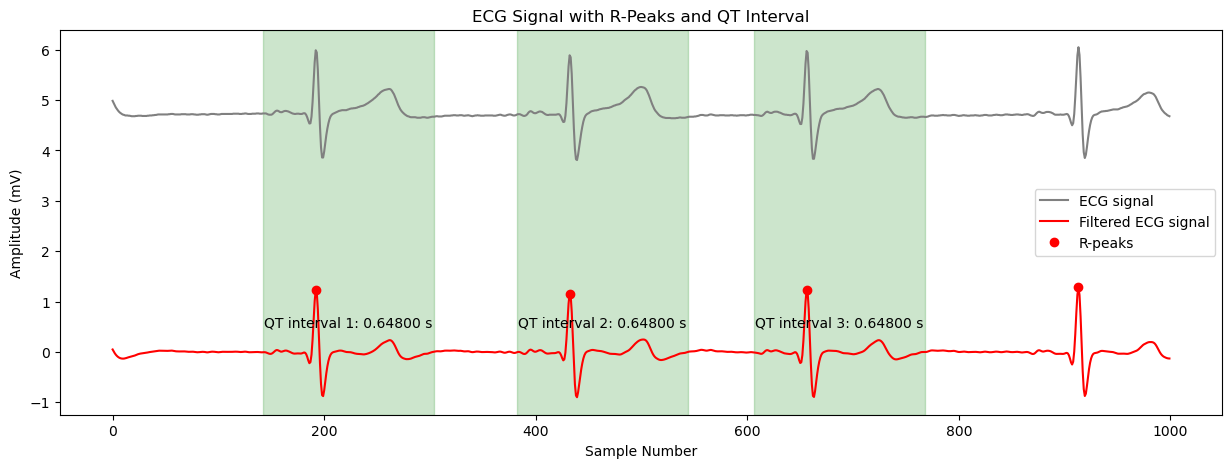

In [35]:
def detect_qt_interval(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Find QRS complex
    qrs_start = r_peaks_in_range - int(0.1 * fs)
    qrs_end = r_peaks_in_range + int(0.3 * fs)
    qrs_peaks = [np.argmax(ecg_cleaned[s:e]) + s for s, e in zip(qrs_start, qrs_end)]

    # Find QT interval
    qt_start = [qrs_peak - int(0.2 * fs) for qrs_peak in qrs_peaks]
    qt_end = [r_peak + int(0.45 * fs) for r_peak in r_peaks_in_range]
    qt_intervals = [(e - s) / fs for s, e in zip(qt_start, qt_end)]
    
#     # Plot ECG signal with R-peaks and QT interval
#     fig, axs = plt.subplots(1, 1, figsize=(15, 5), sharex=True)
#     axs[0].plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
#     axs[0].plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
#     axs[0].plot(r_peaks_in_range - sample_range[0], ecg_cleaned[r_peaks_in_range], "ro", label="R-peaks")
#     axs[0].set_title("ECG Signal with R-Peaks and QT Interval")
#     axs[0].set_xlabel("Sample Number")
#     axs[0].set_ylabel("Amplitude (mV)")
#     axs[0].legend()

#     for i, (start, end) in enumerate(zip(qt_start, qt_end)):
#         if start >= sample_range[0] and end <= sample_range[1]:
#             axs[0].axvspan(start - sample_range[0], end - sample_range[0], alpha=0.2, color='green')
#             axs[0].text((start + end) / 2 - sample_range[0], 0.5, f"QT interval {i+1}: {qt_intervals[i]:.2f} s", ha='center')
   
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax.plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    ax.plot(r_peaks_in_range - sample_range[0], ecg_cleaned[r_peaks_in_range], "ro", label="R-peaks")

    for i, (start, end) in enumerate(zip(qt_start, qt_end)):
        if start >= sample_range[0] and end <= sample_range[1]:
            ax.axvspan(start - sample_range[0], end - sample_range[0], alpha=0.2, color='green')
            ax.text((start + end) / 2 - sample_range[0], 0.5, f"QT interval {i+1}: {qt_intervals[i]:.5f} s", ha='center')

    ax.set_title("ECG Signal with R-Peaks and QT Interval")
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
#     axs[1].plot(qt_intervals, color='green', label='QT intervals')
#     axs[1].set_xlim(0, sample_range[1] - sample_range[0])
#     axs[1].set_ylim(0, 1)
#     axs[1].axis('off')
    plt.tight_layout
    plt.show()
detect_qt_interval(df, [60000, 61000])

In [36]:
df_h = pd.read_csv('/kaggle/input/d1namo-ecg-glucose-data/healthy_subset_ecg_data/healthy_subset_ecg_data/001/sensor_data/2014_10_02-07_11_17/2014_10_02-07_11_17_ECG.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/d1namo-ecg-glucose-data/healthy_subset_ecg_data/healthy_subset_ecg_data/001/sensor_data/2014_10_02-07_11_17/2014_10_02-07_11_17_ECG.csv'

In [ ]:
detect_qt_interval(df,[120000, 121000])
detect_qt_interval(df_h, [120000, 121000])

In [ ]:
!pip install -U biosppy


In [ ]:
def detect_qrs_complexes(df, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)

    # Find R-peaks
    r_peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range = r_peaks[(r_peaks > sample_range[0]) & (r_peaks < sample_range[1])]

    # Find QRS complexes
    qrs_start = r_peaks_in_range - int(0.08 * fs)
    qrs_end = r_peaks_in_range + int(0.15 * fs)
    qrs_start[qrs_start < 0] = 0
    qrs_end[qrs_end >= len(ecg_cleaned)] = len(ecg_cleaned) - 1
    qrs_amplitudes = ecg_cleaned[r_peaks_in_range]
    qrs_complexes = []
    for i in range(len(qrs_start)):
        qrs = ecg_cleaned[qrs_start[i]:qrs_end[i]]
        qrs_complexes.append(qrs)

    # Compute RR intervals
    rr_intervals = np.diff(r_peaks_in_range) / fs

    # Plot ECG signal with QRS complexes and RR intervals
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)
#     ax[0].plot(ecg_signal[sample_range[0]:sample_range[1]], color='gray', label='ECG signal') 
    ax[0].plot(ecg_cleaned[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    for i in range(len(qrs_complexes)):
        ax[0].plot(range(qrs_start[i] - sample_range[0], qrs_end[i] - sample_range[0]), qrs_complexes[i], "g", label="QRS complexes")
    ax[0].plot(r_peaks_in_range - sample_range[0], qrs_amplitudes, "ro", label="R-peaks")
    ax[0].set_title("ECG Signal with QRS Complexes")
    ax[0].set_ylabel("Amplitude (mV)")
    ax[0].legend()

    ax[1].plot(r_peaks_in_range[1:] - sample_range[0], rr_intervals, "bo-", label="RR intervals")
    ax[1].set_title("RR Intervals")
    ax[1].set_xlabel("Sample Number")
    ax[1].set_ylabel("Time (s)")
    ax[1].legend()

    plt.show()


In [ ]:
detect_qrs_complexes1(df, [119990, 120800])
detect_qrs_complexes1(df_h, [119990, 120800])

In [ ]:
def detect_qrs_complexes2(df1, df2, sample_range):
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signals to mV
    ecg_signal1 = (df1['EcgWaveform'].values.astype(float) - 1024) / 200
    ecg_signal2 = (df2['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned1 = filtfilt(b, a, ecg_signal1)
    ecg_cleaned2 = filtfilt(b, a, ecg_signal2)

    # Find R-peaks
    r_peaks1, _ = find_peaks(ecg_cleaned1, height=0.5, distance=fs * 0.3)
    r_peaks2, _ = find_peaks(ecg_cleaned2, height=0.5, distance=fs * 0.3)

    # Select R-peaks within the specified sample range
    r_peaks_in_range1 = r_peaks1[(r_peaks1 > sample_range[0]) & (r_peaks1 < sample_range[1])]
    r_peaks_in_range2 = r_peaks2[(r_peaks2 > sample_range[0]) & (r_peaks2 < sample_range[1])]

    # Find QRS complexes
    qrs_start1 = r_peaks_in_range1 - int(0.08 * fs)
    qrs_end1 = r_peaks_in_range1 + int(0.15 * fs)
    qrs_start1[qrs_start1 < 0] = 0
    qrs_end1[qrs_end1 >= len(ecg_cleaned1)] = len(ecg_cleaned1) - 1
    qrs_amplitudes1 = ecg_cleaned1[r_peaks_in_range1]
    qrs_complexes1 = []
    for i in range(len(qrs_start1)):
        qrs = ecg_cleaned1[qrs_start1[i]:qrs_end1[i]]
        qrs_complexes1.append(qrs)

    qrs_start2 = r_peaks_in_range2 - int(0.08 * fs)
    qrs_end2 = r_peaks_in_range2 + int(0.15 * fs)
    qrs_start2[qrs_start2 < 0] = 0
    qrs_end2[qrs_end2 >= len(ecg_cleaned2)] = len(ecg_cleaned2) - 1
    qrs_amplitudes2 = ecg_cleaned2[r_peaks_in_range2]
    qrs_complexes2 = []
    for i in range(len(qrs_start2)):
        qrs = ecg_cleaned2[qrs_start2[i]:qrs_end2[i]]
        qrs_complexes2.append(qrs)

    # Plot ECG signals with QRS complexes
# Plot ECG signal with QRS complexes
    fig, ax = plt.subplots(figsize=(15, 5))
#     ax.plot(ecg_signal1[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax.plot(ecg_cleaned1[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal') 
    for i in range(len(qrs_complexes1)):
        ax.plot(range(qrs_start1[i] - sample_range[0], qrs_end1[i] - sample_range[0]), qrs_complexes1[i], "g", label="QRS complexes")
    ax.plot(r_peaks_in_range1 - sample_range[0], qrs_amplitudes1, "ro", label="R-peaks")
    
#     ax.plot(ecg_signal2[sample_range[0]:sample_range[1]], color='gray', label='ECG signal')
    ax.plot(ecg_cleaned2[sample_range[0]:sample_range[1]], color='red', label='Filtered ECG signal')
    for i in range(len(qrs_complexes2)):
        ax.plot(range(qrs_start2[i] - sample_range[0], qrs_end2[i] - sample_range[0]), qrs_complexes2[i], "g", label="QRS complexes")
    ax.plot(r_peaks_in_range2 - sample_range[0], qrs_amplitudes2, "ro", label="R-peaks")
    ax.set_title("ECG Signal with QRS Complexes")
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Amplitude (mV)")
    ax.legend()
    plt.show()

In [ ]:
detect_qrs_complexes2(df, df_h, [120000, 120800])

 ## Time Series Analysis 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [ ]:
path = '/kaggle/input/d1namo-ecg-glucose-data/diabetes_subset_ecg_data/diabetes_subset_ecg_data/001/sensor_data/2014_10_01-10_09_39/2014_10_01-10_09_39_ECG.csv'

In [ ]:
df = pd.read_csv(path)
signal = df[60000:61000]['EcgWaveform']
plt.figure(figsize = (15, 7))
plt.plot(signal)
plt.title('ECG Signal')
plt.grid(True)
plt.show()

### 1. Moving Average

In [ ]:
signal = pd.Series(signal)
def moving_average(series, n):
    "Calculate average of last n observations"
    return np.average(series[-n:])

In [ ]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

In [ ]:
plotMovingAverage(df[60000:61000]['EcgWaveform'], 10,plot_anomalies=False,plot_intervals=True)

### 2. Weighted Average

In [ ]:
def weighted_average(series, weights):
    """
        Calculate weighted average on the series.
        Assuming weights are sorted in descending order
        (larger weights are assigned to more recent observations).
    """
    result = 0.0
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

In [ ]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

def plot_smoothed_ecg(df, alpha=0.2):
    ecg_signal = df['EcgWaveform'].values
    time = df['Time'].values
    smoothed_signal = [ecg_signal[0]]
    for i in range(1, len(ecg_signal)):
        smoothed_value = alpha * ecg_signal[i] + (1 - alpha) * smoothed_signal[i-1]
        smoothed_signal.append(smoothed_value)
    plt.figure(figsize=(12,6))
    plt.plot(time, ecg_signal, label='Original Signal')
    plt.plot(time, smoothed_signal, label='Smoothed Signal')
    plt.legend()
    plt.title('Exponential Smoothing of ECG Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.show()
plot_smoothed_ecg(df_s,0.5)

### 3. Autocorrelation and seasonality 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
ecg_signal = df_s['EcgWaveform'].values.flatten()

acf = pd.Series(ecg_signal).autocorr(lag=50)

# Plot the ACF
plot_acf(ecg_signal, lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of ECG Signal')
plt.show()

# feature importance

In [ ]:

# Load data from CSV file
data = pd.read_csv("/kaggle/input/d1namo-helper/merged_a_glucose.csv")
data.head()

In [ ]:
df_f = data.drop(columns = ['filename_x','datetime','new_filename','type','comments','filename_y'],axis=1)
df_f.head()

In [ ]:
df_f['glucose_(mg/dl)'] = df_f['glucose']*18
df_f.head()

In [ ]:

# define the glucose ranges for each class
normal_range = (70, 130)
hypo_range = (0, 70)
hyper_range = (130, np.inf)

# create a new column named 'type' based on the glucose values
df_f['d_type'] = np.where(df_f['glucose_(mg/dl)'].between(*normal_range), 'normal',
                np.where(df_f['glucose_(mg/dl)'].between(*hypo_range), 'hypo',
                np.where(df_f['glucose_(mg/dl)'].between(*hyper_range), 'hyper', 'unknown')))
df_f.head()

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.catplot(x='d_type', y='glucose_(mg/dl)', kind='box', data=df_f)
plt.xlabel('Glucose Type')
plt.ylabel('Glucose Level (mg/dl)')
plt.title('Distribution of Glucose Levels by Type')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

data = df_f.drop(columns=['glucose','glucose_(mg/dl)'],axis =1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['d_type'], test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Select features using threshold
selector = SelectFromModel(rf, prefit=True, threshold='mean')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print selected features
selected_features = data.columns[:-1][selector.get_support()]
print(f'Selected features: {list(selected_features)}')

# Print feature importances
importances = pd.DataFrame(rf.feature_importances_, columns=['Importance'])
importances['Feature'] = data.columns[:-1]
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

# Evaluate performance on test set
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# Sort feature importances in descending order
importances = importances.sort_values(by='Importance', ascending=False)

# Create horizontal barplot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load data from CSV file
data = df_f.drop('d_type',axis =1)

# Separate ECG features and glucose reading
X = df_f.iloc[:, :-1] # features
y = df_f['glucose_(mg/dl)'] # target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
selector = SelectFromModel(rf, prefit=True, threshold='median')
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train linear regression model on selected features
lr = LinearRegression()
lr.fit(X_train_selected, y_train)
y_pred = lr.predict(X_test_selected)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

# Print feature importances
importances = pd.DataFrame(rf.feature_importances_, columns=['Importance'])
importances['Feature'] = df_f.columns[:-1]
importances = importances.sort_values(by='Importance', ascending=False)
print("Feature importances:\n", importances)
# Calculate the residuals
residuals = y_test - y_pred

mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))


# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error (MSE): {:.2f}".format(mse))
print("Mean absolute error (MAE): {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))
# Create a scatter plot of the residuals
plt.scatter(y_test, residuals)
plt.xlabel('True values')
plt.ylabel('Residuals')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()
# Create a bar plot
labels = ['MSE', 'RMSE', 'MAE']
values = [mse, rmse, mae]
plt.bar(labels, values)

# Add values as text on top of bars
for i, value in enumerate(values):
    plt.text(i, value, round(value, 2), ha='center')

# Set axis labels and title
plt.xlabel('Error metric')
plt.ylabel('Value')
plt.title('Regression error analysis')

# Show plot
plt.show()

In [ ]:
# Sort feature importances in descending order
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances[2:]
# Create horizontal barplot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance for Continuous Glucose ')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define X and y
X = df_f.iloc[:, :-1]
y = df_f.iloc[:, -1]

# Create the RFE object and fit the data
rf = RandomForestClassifier()
rfe = RFE(rf, n_features_to_select=11)
rfe.fit(X, y)

# Create a dataframe of the selected features
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_})
selected_features = selected_features[selected_features['Selected'] == True]
selected_features = selected_features.reset_index(drop=True)

# Print the selected features
print(selected_features)

# Plot the feature importances
importances = pd.DataFrame(rfe.estimator_.feature_importances_, columns=['Importance'])
importances['Feature'] = X.columns
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances[2:]
sns.barplot(data=importances, x='Importance', y='Feature', palette='Blues_d')
plt.title('Feature Importance (RFE)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [ ]:
import pandas as pd
import numpy as np

def compute_hr_stats(df):
    # read ECG signal from CSV file
#     df = pd.read_csv(csv_file, header=None)
    # Preprocessing
    fs = 250  # Sampling rate
    lowcut = 3  # Lower frequency of bandpass filter
    highcut = 45  # Higher frequency of bandpass filter

    # Convert ECG signal to mV
    ecg_signal = (df['EcgWaveform'].values.astype(float) - 1024) / 200

    # Apply bandpass filter
    nyquist_rate = fs / 2.0
    low = lowcut / nyquist_rate
    high = highcut / nyquist_rate
    b, a = butter(2, [low, high], btype='band')
    ecg_cleaned = filtfilt(b, a, ecg_signal)
    signal = ecg_cleaned

    # assume sampling frequency is 1000 Hz
#     fs = 1000

    # compute R-peaks using a peak detection algorithm
    peaks, _ = find_peaks(ecg_cleaned, height=0.5, distance=fs * 0.3)

  
    # compute RR intervals
    rr_ints = np.diff(peaks) / fs

    # compute heart rate (HR) in bpm
    hr = 60 / rr_ints

    # compute mean HR
    mean_hr = np.mean(hr)

    # compute SDNN
    sdnn = np.std(rr_ints)

    # compute RMSSD
    rmssd = np.sqrt(np.mean(np.square(np.diff(rr_ints))))

    # compute nn_50
    nn_50 = np.sum(np.abs(np.diff(rr_ints)) > 0.05)

    # compute pNN_50
    pnn_50 = nn_50 / len(rr_ints)

    # compute SDHR
    sdhr = np.std(hr)

    # compute mean RR interval
    mean_rr = np.mean(rr_ints)

    # compute TINN
    diffs = np.diff(peaks) / fs
    tinn = np.sum(np.square(np.diff(diffs)))

    # compute HRV Triangular Index
    hrv_tri_index = np.sum(np.abs(np.diff(rr_ints))) / np.sum(rr_ints)

    # create pandas DataFrame with results
    results = pd.DataFrame({
        'SDNN': sdnn,
        'RMSSD': rmssd,
        'nn_50': nn_50,
        'pNN_50': pnn_50,
        'meanHR': mean_hr,
        'SDHR': sdhr,
        'meanRR': mean_rr,
        'TINN': tinn,
        'HRVTriIndex': hrv_tri_index
    },index=[0])

    return results


In [ ]:
df_hrv = compute_hr_stats(df_s)
df_hrv.head()